# Capstone Project 2 - Microsoft Malware Prediction

### Introduction
This is a capstone project of Springboard Data Science Track Bootcamp. The data is from [Kaggle](https://www.kaggle.com/c/microsoft-malware-prediction/data) closed competition. Kaggle’s data comes from Microsoft, and this competition provide to improve consumers' security.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)

In [2]:
%time df = pd.read_csv('Data/train.csv')

</Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/decorator.py:decorator-gen-61>:2: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 2min 25s, sys: 27.9 s, total: 2min 53s
Wall time: 2min 59s


In [3]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSI

In [4]:
df.shape

(8921483, 83)

According to the dataframe above, some of the data features' name are very easy to understand. I'll include some of the feature meanings that needs to be clarified.

1. CountryIdentifier: ID for the country the machine is located in.
2. CityIdentifier: ID for the city the machine is located in.
3. OrganizationIdentifier: ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries.
4. GeoNameIdentifier: ID for the geographic region a machine is located in.
5. LocaleEnglishNameIdentifier: English name of Locale ID of the current user.
6. Platform: Calculates platform name (of OS related properties and processor property).
7. OsVer: Version of the current operating system.
8. OsBuild: Build of the current operating system.
9. OsSuite: Product suite mask for the current operating system.
10. OsPlatformSubRelease: Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2).
11. OsBuildLab: Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022.
12. SkuEdition: The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.
13. IsProtected: This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
14. AutoSampleOptIn: This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+.
15. PuaMode: Pua Enabled mode from the service.
16. SMode: This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed.
17. SmartScreen: This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.
18. Firewall: This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
19. UacLuaenable: This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
20. Census_MDC2FormFactor: A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...).
21. Census_DeviceFamily: AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone.
22. Census_ProcessorClass: A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated.
23. Census_PrimaryDiskTotalCapacity: Amount of disk space on primary disk of the machine in MB
24. Census_PrimaryDiskTypeName: Friendly name of Primary Disk Type - HDD or SSD.
25. Census_SystemVolumeTotalCapacity: The size of the partition that the System volume is installed on in MB.
26. Census_TotalPhysicalRAM: Retrieves the physical RAM in MB.
27. Census_ChassisTypeName: Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx.
28. Census_InternalPrimaryDisplayResolutionHorizontal: Retrieves the number of pixels in the horizontal direction of the internal display.
29. Census_InternalPrimaryDisplayResolutionVertical: Retrieves the number of pixels in the vertical direction of the internal display.
30. Census_PowerPlatformRoleName: Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device.
31. Census_OSBranch: Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
32. Census_OSBuildNumber: OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
33. Census_OSBuildRevision: OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
34. Census_OSEdition: Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
35. Census_OSInstallTypeName: Friendly description of what install was used on the machine i.e. clean
36. Census_OSWUAutoUpdateOptionsName: Friendly name of the WindowsUpdate auto-update settings on the machine.
37. Census_IsPortableOperatingSystem: Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
38. Census_GenuineStateName: Friendly name of OSGenuineStateID. 0 = Genuine
39. Census_ActivationChannel: Retail license key or Volume license key for a machine.
40. Census_IsFlightsDisabled: Indicates if the machine is participating in flighting.
41. Census_FlightRing: The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
42. Census_IsSecureBootEnabled: Indicates if Secure Boot mode is enabled.
43. Census_IsVirtualDevice: Identifies a Virtual Machine (machine learning model)
44. Census_IsAlwaysOnAlwaysConnectedCapable: Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
45. Wdft_IsGamer: Indicates whether the device is a gamer device or not based on its hardware combination.

Text(0.5, 1.0, 'Has Dections (Target Value)')

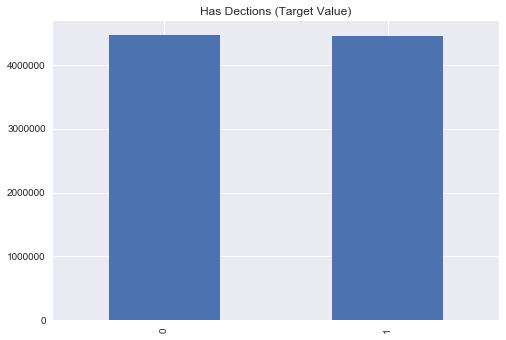

In [5]:
df.HasDetections.value_counts().plot.bar()
plt.title('Has Dections (Target Value)')

According to the figure above, we could notice that the dataset is perfectly balanced.

### Exploratory analysis
The goal of this part is trying to find patterns and gain insight among features, and select useful features to perform better models.

In [6]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['missing value', 'percentage'])

In [7]:
missing_data.head(50)

,missing value,percentage
PuaMode,8919174,99.974119
Census_ProcessorClass,8884852,99.589407
DefaultBrowsersIdentifier,8488045,95.141637
Census_IsFlightingInternal,7408759,83.044030
Census_InternalBatteryType,6338429,71.046809
Census_ThresholdOptIn,5667325,63.524472
Census_IsWIMBootEnabled,5659703,63.439038
SmartScreen,3177011,35.610795
OrganizationIdentifier,2751518,30.841487
SMode,537759,6.027686


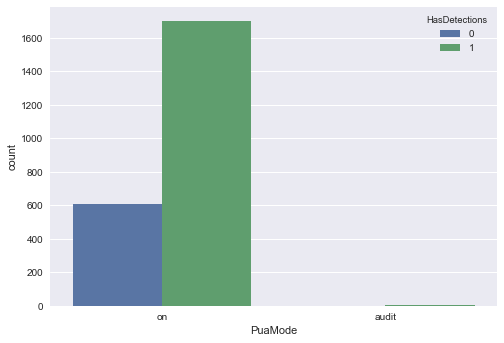

In [8]:
sns.countplot(x='PuaMode', hue='HasDetections', data=df)
plt.show()

We can remove this feature cause there's not very big difference.

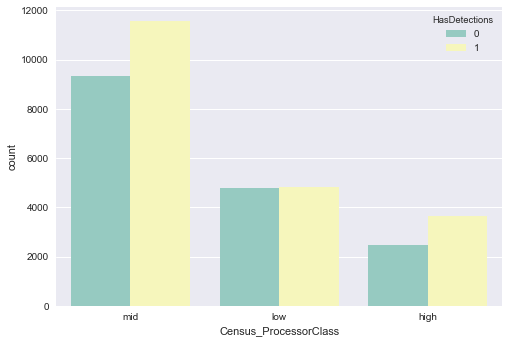

In [9]:
sns.countplot(x='Census_ProcessorClass', hue='HasDetections', data=df, palette="Set3")
plt.show()

The meaning of 'Census_ProcessorClassr' is 'Number of logical cores in the processor'. This feature could be a good features only or component for the combinations with other features.

In [10]:
df.DefaultBrowsersIdentifier.dtype

dtype('float64')

In [11]:
df.DefaultBrowsersIdentifier.dtype

dtype('float64')

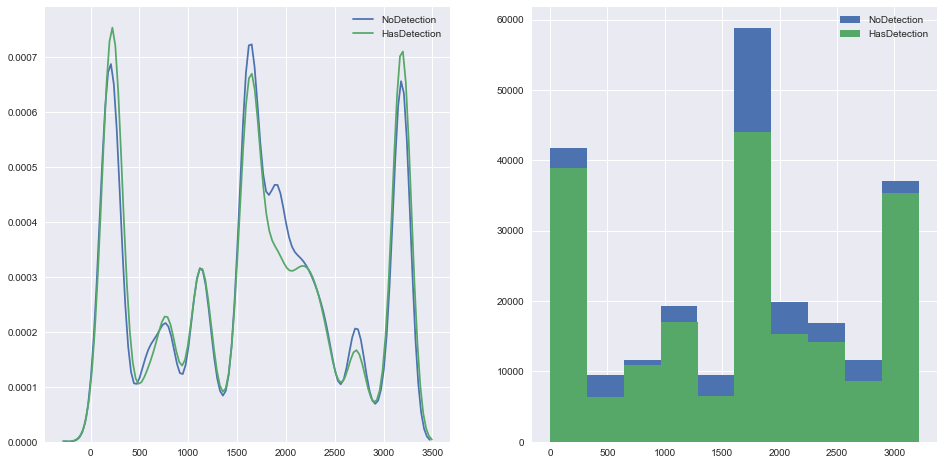

In [12]:
fig, ax = plt.subplots(1, 2, figsize= (16, 8))
sns.kdeplot(df.loc[df['HasDetections'] == 0, 'DefaultBrowsersIdentifier'], ax=ax[0], label='NoDetection')
sns.kdeplot(df.loc[df['HasDetections'] == 1, 'DefaultBrowsersIdentifier'], ax=ax[0], label='HasDetection')
df.loc[df['HasDetections'] == 0, 'DefaultBrowsersIdentifier'].hist(ax=ax[1])
df.loc[df['HasDetections'] == 1, 'DefaultBrowsersIdentifier'].hist(ax=ax[1])
ax[1].legend(['NoDetection', 'HasDetection'])
plt.show()

In [13]:
df.Census_IsFlightingInternal.dtype

dtype('float64')

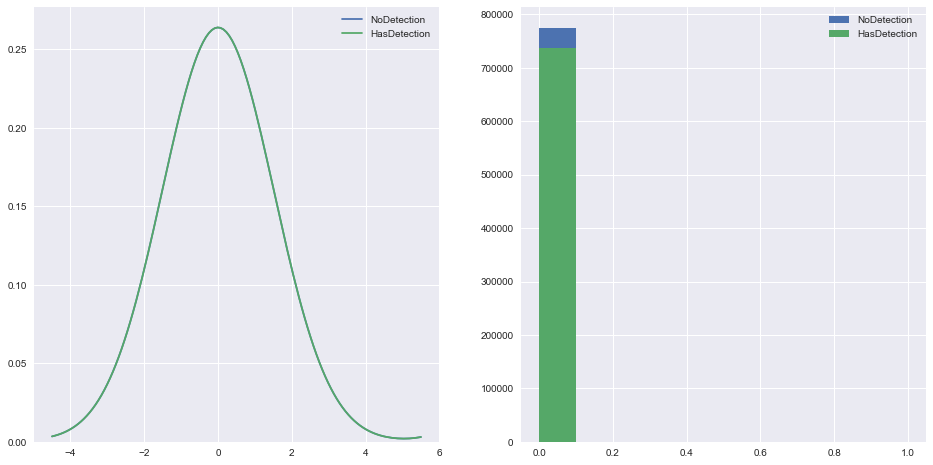

In [14]:
fig, ax = plt.subplots(1, 2, figsize= (16, 8))
sns.kdeplot(df.loc[df['HasDetections'] == 0, 'Census_IsFlightingInternal'], ax=ax[0], label='NoDetection', bw=1.5)
sns.kdeplot(df.loc[df['HasDetections'] == 1, 'Census_IsFlightingInternal'], ax=ax[0], label='HasDetection', bw=1.5)
df.loc[df['HasDetections'] == 0, 'Census_IsFlightingInternal'].hist(ax=ax[1])
df.loc[df['HasDetections'] == 1, 'Census_IsFlightingInternal'].hist(ax=ax[1])
ax[1].legend(['NoDetection', 'HasDetection'])
plt.show()

We can remove this feature since most of the value is 0.

In [15]:
df.Census_InternalBatteryType.dtypes

dtype('O')

In [16]:
df.Census_InternalBatteryType.value_counts()

lion    2028256
li-i     245617
#        183998
lip       62099
liio      32635
         ...   
í-i          1
lilo          1
h4°s          1
÷ÿóö          1
4ion          1
Name: Census_InternalBatteryType, Length: 78, dtype: int64

In [17]:
def group_battery(x):
    x = str(x)
    x = x.lower()
    if 'li' in x:
        return 1
    else:
        return 0
    
df['Census_InternalBatteryType'] = df['Census_InternalBatteryType'].apply(group_battery)

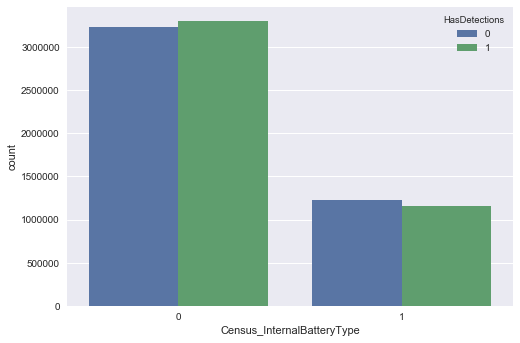

In [18]:
sns.countplot(x='Census_InternalBatteryType', hue='HasDetections', data=df)
plt.show()

According to the graph above, we can notice that the difference between 'has detections' or not is very small. So we can remove this feature.

Draw heatmap to double check the relationship between removed features and the target value.

In [19]:
data = df[['HasDetections', 'DefaultBrowsersIdentifier', 'PuaMode', 'Census_IsFlightingInternal', 'Census_InternalBatteryType']]

In [20]:
corr = data.corr()

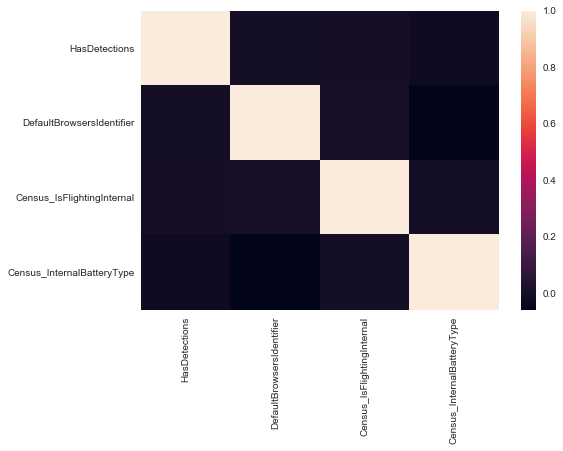

In [21]:
ax = sns.heatmap(corr)

In [22]:
col_to_remove = ['DefaultBrowsersIdentifier', 'PuaMode', 'Census_IsFlightingInternal', 
                 'Census_InternalBatteryType']
df.drop(col_to_remove, axis=1, inplace=True)

### Categorical Features

Then let's look at categorical features.

In [23]:
cat_features = ['ProductName',                                          
                'EngineVersion',                                        
                'AppVersion',                                           
                'AvSigVersion',                                         
                'Platform',                                             
                'Processor',                                            
                'OsVer',                                                
                'OsPlatformSubRelease',                                 
                'OsBuildLab',                                           
                'SkuEdition',                                           
                'SmartScreen',                                          
                'Census_MDC2FormFactor',                                
                'Census_DeviceFamily',                                  
                'Census_PrimaryDiskTypeName',                           
                'Census_ChassisTypeName',                               
                'Census_PowerPlatformRoleName',                         
                'Census_OSVersion',                                     
                'Census_OSArchitecture',                                
                'Census_OSBranch',                                      
                'Census_OSEdition',                                     
                'Census_OSSkuName',                                     
                'Census_OSInstallTypeName',                             
                'Census_OSWUAutoUpdateOptionsName',                     
                'Census_GenuineStateName',                              
                'Census_ActivationChannel',                             
                'Census_FlightRing']

In [24]:
df.ProductName.value_counts()

win8defender     8826520
mse                94873
mseprerelease         53
scep                  22
windowsintune          8
fep                    7
Name: ProductName, dtype: int64

In [25]:
def plot_category_percent_of_target(col):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    cat_percent = df[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = df[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent.HasDetections.fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:20]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])
    for i, v in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (v.get_width(), v.get_y()+0.5), fontweight='bold')
    plt.xlabel('Percent of Detections')
    plt.ylabel(col)
    plt.show()

#### Product Name

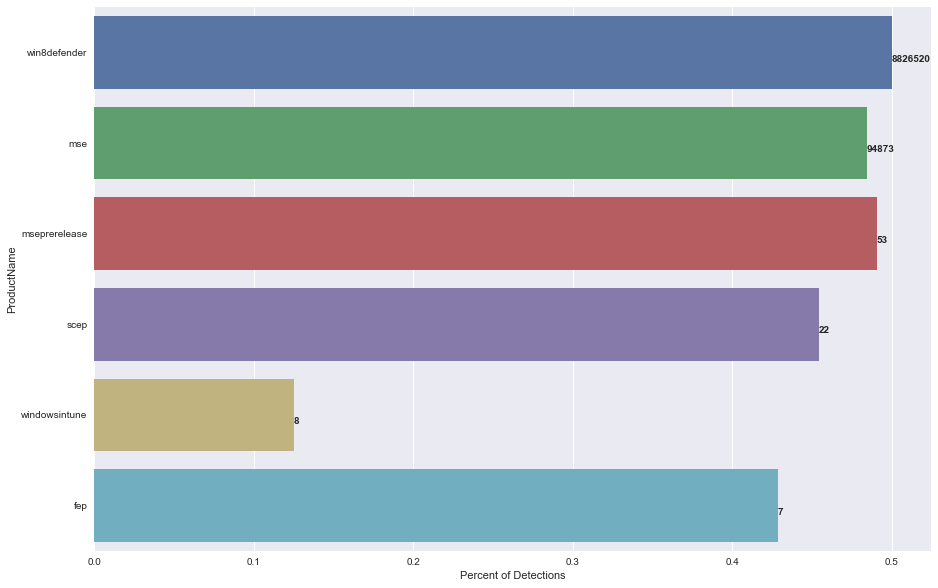

In [26]:
col = cat_features[0]
plot_category_percent_of_target(col)

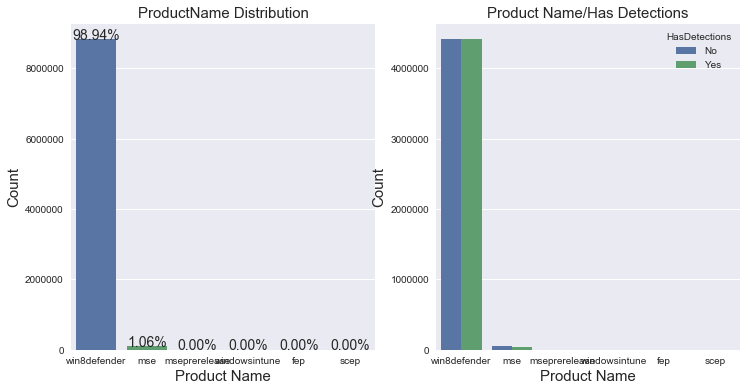

In [27]:
plt.figure(figsize=(12,6))

total = len(df)

plt.subplot(121)
g = sns.countplot(x='ProductName', data=df)
g.set_title('ProductName Distribution', fontsize = 15)
g.set_xlabel("Product Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(122)
g1 = sns.countplot(x='ProductName', hue='HasDetections', data=df)
g1.set_title('Product Name/Has Detections', fontsize = 15)
g1.set_xlabel("Product Name", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
plt.legend(title='HasDetections', loc='best', labels=['No', 'Yes'])
plt.show()

#### Engine Version

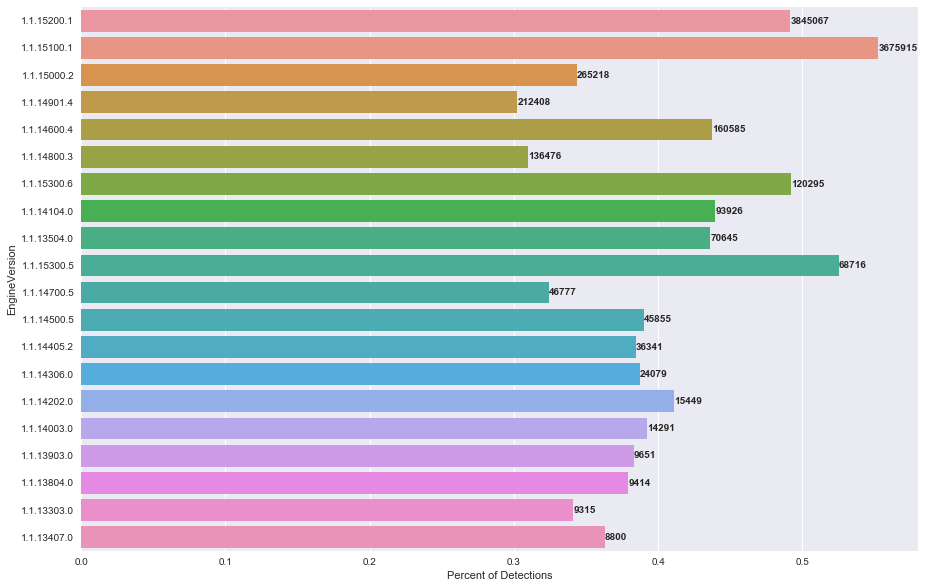

In [28]:
col = cat_features[1]
plot_category_percent_of_target(col)

#### App Version

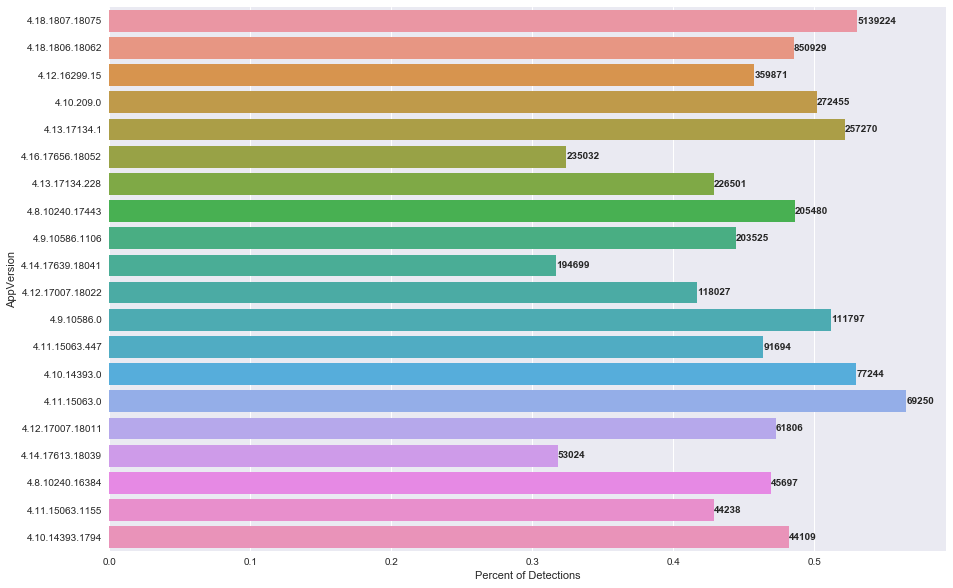

In [29]:
col = cat_features[2]
plot_category_percent_of_target(col)

#### Processor and Census OSArchitecture

In [30]:
df.Processor.value_counts(dropna=False)

x64      8105435
x86       815702
arm64        346
Name: Processor, dtype: int64

In [31]:
df.Census_OSArchitecture.value_counts(dropna=False)

amd64    8105885
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

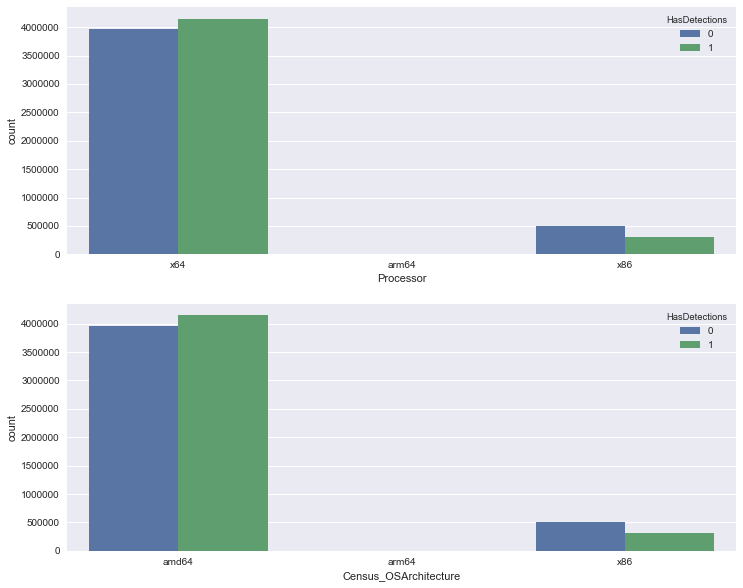

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.countplot(x='Processor', hue='HasDetections', data=df, ax=axes[0], order=['x64', 'arm64', 'x86'])
sns.countplot(x='Census_OSArchitecture', hue='HasDetections', data=df, ax=axes[1], order=['amd64', 'arm64', 'x86'])

#### OsPlatformSubRelease

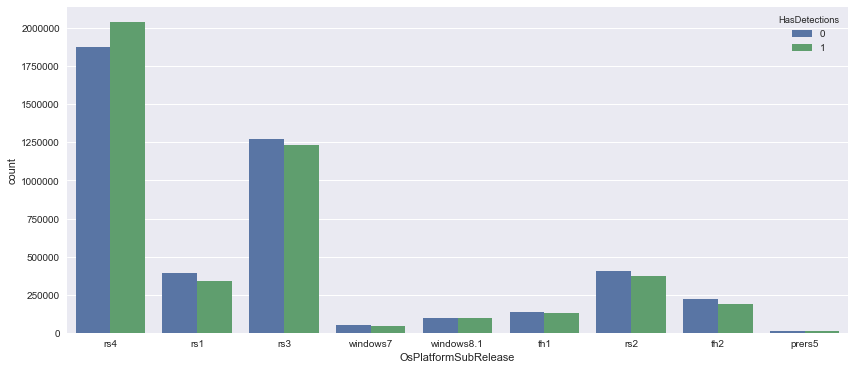

In [33]:
plt.figure(figsize=(14,6))
sns.countplot(x='OsPlatformSubRelease', hue='HasDetections', data=df)

In [34]:
corr = df.corr()

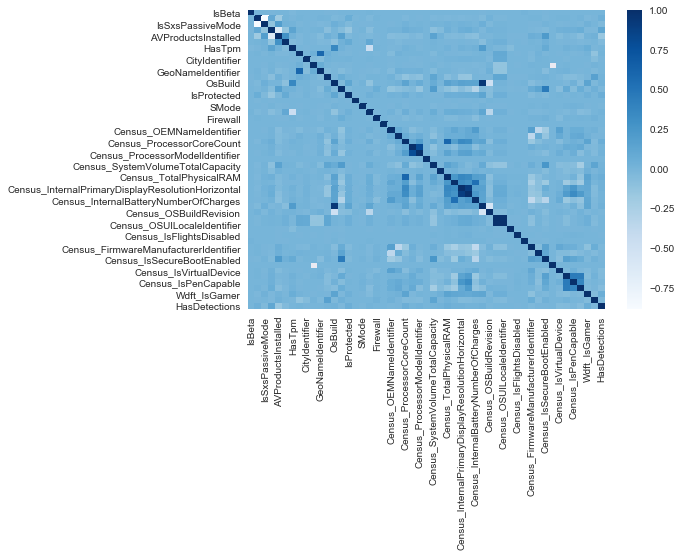

In [35]:
corr.round()
sns.heatmap(corr, cmap='Blues')

In [36]:
def convert_types(df):
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')
        
        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)  
        
    return df

In [37]:
df = convert_types(df)

In [38]:
df.Wdft_IsGamer.value_counts()

0.0    6174143
1.0    2443889
Name: Wdft_IsGamer, dtype: int64

In [39]:
num_cols = ['RtpStateBitfield',                           
            'AVProductStatesIdentifier',                            
            'AVProductsInstalled',                                  
            'AVProductsEnabled',                                                                                     
            'CountryIdentifier',                                    
            'CityIdentifier',                                       
            'OrganizationIdentifier',                               
            'GeoNameIdentifier',                                    
            'LocaleEnglishNameIdentifier',                          
            'OsBuild',                                              
            'OsSuite',                                                
            'IeVerIdentifier',                                            
            'UacLuaenable',                                         
            'Census_OEMNameIdentifier',                             
            'Census_OEMModelIdentifier',                            
            'Census_ProcessorCoreCount',                            
            'Census_ProcessorManufacturerIdentifier',               
            'Census_ProcessorModelIdentifier',                      
            'Census_PrimaryDiskTotalCapacity',                      
            'Census_SystemVolumeTotalCapacity',                          
            'Census_TotalPhysicalRAM',                              
            'Census_InternalPrimaryDiagonalDisplaySizeInInches',    
            'Census_InternalPrimaryDisplayResolutionHorizontal',    
            'Census_InternalPrimaryDisplayResolutionVertical',      
            'Census_InternalBatteryNumberOfCharges',                
            'Census_OSBuildNumber',                                 
            'Census_OSBuildRevision',                               
            'Census_OSInstallLanguageIdentifier',                   
            'Census_OSUILocaleIdentifier',                               
            'Census_FirmwareManufacturerIdentifier',                
            'Census_FirmwareVersionIdentifier',                                        
            'Wdft_RegionIdentifier']

In [40]:
bin_cols = ['IsBeta', 
            'IsSxsPassiveMode', 
            'HasTpm', 'IsProtected', 
            'AutoSampleOptIn', 
            'SMode', 
            'Firewall', 
            'Census_HasOpticalDiskDrive', 
            'Census_IsPortableOperatingSystem', 
            'Census_IsFlightsDisabled', 
            'Census_ThresholdOptIn', 
            'Census_IsSecureBootEnabled', 
            'Census_IsWIMBootEnabled', 
            'Census_IsVirtualDevice', 
            'Census_IsTouchEnabled', 
            'Census_IsPenCapable', 
            'Census_IsAlwaysOnAlwaysConnectedCapable', 
            'Wdft_IsGamer']

In [41]:
for feature in num_cols:
    df[feature] = df[feature].fillna(-1)

for feature in bin_cols:
    df[feature] = df[feature].fillna(df[feature].mode()[0])


In [42]:
correct_feature_by_hand = ['AppVersion',
                         'AvSigVersion',
                         'Census_ActivationChannel',
                         'Census_ChassisTypeName',
                         'Census_DeviceFamily',
                         'Census_FlightRing',
                         'Census_GenuineStateName',
                         'Census_MDC2FormFactor',
                         'Census_OSArchitecture',
                         'Census_OSBranch',
                         'Census_OSEdition',
                         'Census_OSInstallTypeName',
                         'Census_OSSkuName',
                         'Census_OSVersion',
                         'Census_OSWUAutoUpdateOptionsName',
                         'Census_PowerPlatformRoleName',
                         'Census_PrimaryDiskTypeName',
                         'EngineVersion',
                         'MachineIdentifier',
                         'OsBuildLab',
                         'OsPlatformSubRelease',
                         'OsVer',
                         'Platform',
                         'Processor',
                         'SkuEdition',
                         'SmartScreen']

In [43]:
for feature in correct_feature_by_hand:
    df[feature] = df[feature].str.lower()

In [44]:
def rename_Census_ActivationChannel(x):
    x = x.lower()
    if 'oem' in x:
        return 'oem'
    elif 'volume' in x:
        return 'volume'
    elif 'retail' in x:
        return 'retail'
    else:
        return x

In [45]:
df['Census_ActivationChannel'] = df['Census_ActivationChannel'].astype(str)
df['Census_ActivationChannel'] = df['Census_ActivationChannel'].apply(rename_Census_ActivationChannel)
df['Census_ActivationChannel'] = df['Census_ActivationChannel'].astype('category')

In [46]:
def rename_Census_ChassisTypeName(x):
    x = x.lower()
    if 'laptop' in x:
        return 'Notebook'
    elif 'other' in x:
        return 'unknown'                  
    else:
        return x

In [47]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].fillna('unknown')
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].astype(str)
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].apply(rename_Census_ChassisTypeName)
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].astype('category')
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].cat.remove_unused_categories()

In [48]:
df['Census_DeviceFamily'].replace(['windows'], 'windows.desktop', inplace=True)
df['Census_DeviceFamily'] = df['Census_DeviceFamily'].astype('category')
df['Census_DeviceFamily'] = df['Census_DeviceFamily'].cat.remove_unused_categories()

In [49]:
col_to_remove = ['MachineIdentifier', 'EngineVersion', 'AppVersion', 
                 'AvSigVersion', 'OsBuildLab', 'OsVer', 'Census_OSVersion', 
                 'Census_OSSkuName']
df.drop(col_to_remove, axis=1, inplace=True)

In [50]:
df1 = df

In [51]:
df1

,ProductName,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,17134,256,rs4,pro,1.0,0,0.0,137.0,NaN,1.0,1.0,desktop,windows.desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,hdd,299451.0,0,4096.0,desktop,18.906250,1440.0,900.0,desktop,4.294967e+09,amd64,rs4_release,17134,165,professional,uupupgrade,26.0,119,unknown,0,is_genuine,retail,0.0,retail,0.0,628.0,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,17134,256,rs4,pro,1.0,0,0.0,137.0,NaN,1.0,1.0,notebook,windows.desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,hdd,102385.0,0,4096.0,notebook,13.898438,1366.0,768.0,mobile,1.000000e+00,amd64,rs4_release,17134,1,professional,ibsclean,8.0,31,unknown,0,offline,retail,0.0,not_set,0.0,628.0,57858.0,0,0.0,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,17134,768,rs4,home,1.0,0,0.0,137.0,requireadmin,1.0,1.0,desktop,windows.desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,ssd,113907.0,0,4096.0,desktop,21.500000,1920.0,1080.0,desktop,4.294967e+09,amd64,rs4_release,17134,165,core,uupupgrade,7.0,30,fullauto,0,is_genuine,oem,0.0,retail,0.0,142.0,52682.0,0,0.0,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,-1.0,117.0,115,windows10,x64,17134,256,rs4,pro,1.0,0,0.0,137.0,existsnotset,1.0,1.0,desktop,windows.desktop,1443.0,275890.0,4.0,5.0,2272.0,NaN,238475.0,unknown,227116.0,0,4096.0,minitower,18.500000,1366.0,768.0,desktop,4.294967e+09,amd64,rs4_release,17134,228,professional,uupupgrade,17.0,64,fullauto,0,is_genuine,oem,0.0,retail,0.0,355.0,20050.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,-1.0,277.0,75,windows10,x64,17134,768,rs4,home,1.0,0,0.0,137.0,requireadmin,1.0,1.0,notebook,windows.desktop,1443.0,331929.0,4.0,5.0,2500.0,NaN,476940.0,hdd,101900.0,0,6144.0,portable,14.000000,1366.0,768.0,mobile,0.000000e+00,amd64,rs4_release,17134,191,core,update,8.0,31,fullauto,0,is_genuine,retail,0.0,retail,0.0,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,win8defender,0,7.0,

In [52]:
dum_fea = ['ProductName', 'Platform', 'Processor', 'OsPlatformSubRelease', 
       'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 
       'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 
       'Census_PowerPlatformRoleName', 'Census_OSArchitecture', 'Census_OSBranch', 
       'Census_OSEdition', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 
       'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']

In [53]:
for col in dum_fea:
    dum= pd.get_dummies(df[col])
    df1 = pd.concat([df1, dum], axis=1)

In [54]:
df1.drop(dum_fea, axis=1, inplace=True)

In [55]:
df1

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,fep,mse,mseprerelease,scep,win8defender,windowsintune,windows10,windows2016,windows7,windows8,arm64,x64,x86,prers5,rs1,rs2,rs3,rs4,th1,th2,windows7,windows8.1,cloud,education,enterprise,enterprise ltsb,home,invalid,pro,server,&#x01;,&#x02;,&#x03;,0,00000000,block,enabled,existsnotset,off,on,prompt,promt,requireadmin,warn,allinone,convertible,desktop,detachable,iotother,largeserver,largetablet,mediumserver,notebook,pcother,serverother,smallserver,smalltablet,windows.desktop,windows.server,high,low,mid,hdd,ssd,unknown,unspecified,0,112,127,25,28,30,31,32,35,36,39,44,45,49,76,81,82,88,Notebook,allinone,blade,bladeenclosure,busexpansionchassis,compactpci,convertible,desktop,detachable,dockingstation,embeddedpc,expansionchassis,handheld,iotgateway,lowprofiledesktop,lunchbox,mainserverchassis,minipc,minitower,multisystemchassis,notebook,pizzabox,portable,rackmountchassis,sealedcasepc,spacesaving,stickpc,subchassis,subnotebook,tablet,tower,unknown,appliancepc,desktop,enterpriseserver,mobile,performanceserver,slate,sohoserver,unknown,unspecified,workstation,amd64,arm64,x86,khmer os,rs1_release,rs1_release_sec,rs1_release_srvmedia,rs1_release_svc,rs2_release,rs3_release,rs3_release_svc,rs3_release_svc_escrow,rs3_release_svc_escrow_im,rs4_release,rs5_release,rs5_release_edge,rs5_release_sigma,rs5_release_sigma_dev,rs5_release_sign,rs_onecore_base_cobalt,rs_onecore_stack_per1,rs_prerelease,rs_prerelease_flt,rs_shell,rs_xbox,th1,th1_st1,th2_release,th2_release_sec,win7sp1_ldr,win7sp1_ldr_escrow,win8_gdr,win8_ldr,winblue_ltsb,winblue_ltsb_escrow,cloud,cloudn,core,corecountryspecific,coren,coresinglelanguage,education,educationn,enterprise,enterprise 2015 ltsb,enterprisen,enterprises,enterprisesn,home,homepremium,pro,professional,professionalcountryspecific,professionaleducation,professionaleducationn,professionaln,professionalsinglelanguage,professionalworkstation,professionalworkstationn,serverdatacenter,serverdatacenteracor,serverdatacentereval,serverrdsh,serversolution,serverstandard,serverstandardeval,ultimate,clean,cleanpcrefresh,ibsclean,other,refresh,reset,update,upgrade,uupupgrade,autoinstallandrebootatmaintenancetime,downloadnotify,fullauto,notify,off,unknown,invalid_license,is_genuine,offline,tampered,unknown,oem,retail,volume,canary,disabled,invalid,not_set,osg,retail,rp,unknown,wif,wis
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,9124.0,4.0,5.0,2340.0,476940.0,299451.0,0,4096.0,18.906250,1440.0,900.0,4.294967e+09,17134,165,26.0,119,0,0.0,0.0,628.0,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
df1.shape

(8921483, 277)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=df1.drop('HasDetections', axis=1)
y=df1.HasDetections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = LogisticRegression(C=0.05)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test, y_pred)
a_score

0.49973076228125274

In [57]:
df2 = df
df2.drop(dum_fea, axis=1, inplace=True)


In [58]:
df2

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,9124.0,4.0,5.0,2340.0,476940.0,299451.0,0,4096.0,18.906250,1440.0,900.0,4.294967e+09,17134,165,26.0,119,0,0.0,0.0,628.0,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,91656.0,4.0,5.0,2404.0,476940.0,102385.0,0,4096.0,13.898438,1366.0,768.0,1.000000e+00,17134,1,8.0,31,0,0.0,0.0,628.0,57858.0,0,0.0,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,17134,768,1.0,0,0.0,137.0,1.0,1.0,4908.0,317701.0,4.0,5.0,1972.0,114473.0,113907.0,0,4096.0,21.500000,1920.0,1080.0,4.294967e+09,17134,165,7.0,30,0,0.0,0.0,142.0,52682.0,0,0.0,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,-1.0,117.0,115,17134,256,1.0,0,0.0,137.0,1.0,1.0,1443.0,275890.0,4.0,5.0,2272.0,238475.0,227116.0,0,4096.0,18.500000,1366.0,768.0,4.294967e+09,17134,228,17.0,64,0,0.0,0.0,355.0,20050.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,-1.0,277.0,75,17134,768,1.0,0,0.0,137.0,1.0,1.0,1443.0,331929.0,4.0,5.0,2500.0,476940.0,101900.0,0,6144.0,14.000000,1366.0,768.0,0.000000e+00,17134,191,8.0,31,0,0.0,0.0,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,0,7.0,0,53447.0,1.0,1.0,1,66,84963.0,-1.0,89.0,88,16299,768,1.0,0,0.0,117.0,1.0,1.0,585.0,189419.0,4.0,1.0,142.0,953869.0,936175.0,0,4096.0,15.500000,1366.0,768.0,0.000000e+00,16299,431,14.0,49,0,0.0,0.0,556.0,63069.0,1,0.0,0.0,0,0,0.0,0.0,5.0,1
8921479,0,7.0,0,59914.0,2.0,1.0,1,66,82414.0,27.0,89.0,88,10586,256,0.0,0,0.0,86.0,1.0,1.0,1443.0,275958.0,2.0,5.0,3366.0,76293.0,75741.0,0,2048.0,19.000000,1280.0,1024.0,4.294967e+09,10586,679,14.0,49,0,0.0,0.0,-1.0,-1.0,0,0.0,0.0,0,0,0.0,0.0,5.0,0
8921480,0,7.0,0,53447.0,1.0,1.0,1,43,134580.0,27.0,53.0,42,16299,768,1.0,0,0.0,117.0,1.0,1.0,4904.0,315307.0,8.0,5.0,3104.0,244198.0,242989.0,0,8192.0,15.500000,1920.0,1080.0,0.000000e+00,16299,371,37.0,158,0,0.0,0.0,513.0,71061.0,1,0.0,0.0,0,0,0.0,0.0,7.0,1
8921481,0,7.0,0,6630.0,3.0,1.0,1,207,159430.0,33.0,277.0,75,15063,768,1.0,0,0.0,108.0,1.0,1.0,2102.0,228975.0,2.0,5.0,1998.0,476940.0,463486.0,0,4096.0,12.703125,1024.0,768.0,0.000000e+00,15063,483,8.0,31,0,0.0,0.0,554.0,33142.0,1,0.0,0.0,0,0,0.0,0.0,13.0,1


In [59]:
df2.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06,8921483.0,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,4.764579e+04,NaN,NaN,9.879711e-01,1.080490e+02,7.830230e+04,NaN,NaN,1.228161e+02,1.571997e+04,5.751534e+02,NaN,2.891896e-05,0.0,NaN,NaN,1.301068e+01,NaN,2.364021e+05,NaN,NaN,NaN,3.070696e+06,3.751263e+05,7.718728e-02,6.060050e+03,NaN,NaN,NaN,1.089928e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,0.0,0.0,NaN,3.243510e+04,4.860229e-01,0.0,0.0,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,1.433048e+04,0.0,0.0,1.090149e-01,6.304706e+01,5.038158e+04,0.0,NaN,6.932125e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,0.0,NaN,0.0,9.861774e+03,NaN,7.592768e+04,0.0,0.0,NaN,4.438388e+09,3.262012e+05,2.668884e-01,5.125428e+03,0.000000e+00,NaN,NaN,1.869027e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,0.0,0.0,NaN,2.146836e+04,4.998046e-01,0.0,0.0,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,-1.0,0.000000e+00,-1.000000e+00,-1.0,-1.0,0.000000e+00,1.000000e+00,-1.000000e+00,-1.0,-1.0,1.000000e+00,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.0,-1.0,0.0,-1.000000e+00,-1.0,-1.000000e+00,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,-1.000000e+00,7.600000e+03,0.000000e+00,-1.0,1.000000e+00,0.000000e+00,0.0,0.0,-1.0,-1.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,-1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.127600e+04,-1.0,89.0,7.400000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.0,108.0,1.0,1.000000e+00,1443.0,1.895470e+05,2.0,5.0,1998.0,2.384750e+05,1.204880e+05,0.000000e+00,4.096000e+03,1.389844e+01,1366.0,768.0,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e+00,0.0,0.0,142.0,1.246300e+04,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e+00,5.344700e+04,1.0,1.0,1.000000e+00,9.700000e+01,7.786600e+04,18.0,181.0,8.800000e+01,1.629900e+04,7.680000e+02,1.0,0.000000e+00,0.0,117.0,1.0,1.000000e+00,2102.0,2.460030e+05,4.0,5.0,2500.0,4.769400e+05,2.489770e+05,0.000000e+00,4.096000e+03,1.550000e+01,1366.0,768.0,0.000000e+00,1.629900e+04,2.850000e+02,9.0,3.400

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

X2=df2.drop('HasDetections', axis=1)
y2=df2.HasDetections
X_scaled = scale(X2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.25)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logre = LogisticRegression()
log_cv = GridSearchCV(logre, param_grid, cv=5)
log_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.587808125178444


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

X2=df2.drop('HasDetections', axis=1)
y2=df2.HasDetections
X_scaled = scale(X2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.25)
c_space = np.arange(1, 11)
param_grid = {'C': c_space}
logre = LogisticRegression()
log_cv = GridSearchCV(logre, param_grid, cv=5)
log_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.5877247308930394


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X=df1.drop('HasDetections', axis=1)
y=df1.HasDetections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_rf = roc_auc_score(y_test, y_pred_rf)
print('ROC-ACU score of Random Forest method is: ' + str(roc_score_rf))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [290]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(X_test)

In [300]:
print(x_test_pca[0, 0])
print(x_test_pca[0, 1])
x_test_pca[0]

-3527615.2131746486
-1091441990.4334662


array([-3.52761521e+06, -1.09144199e+09])

In [304]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

<ipython-input-319-4d5ee93fbe41>:5: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(x_test_pca[y_pred == i, 0]), np.log(x_test_pca[y_pred == i, 1]),


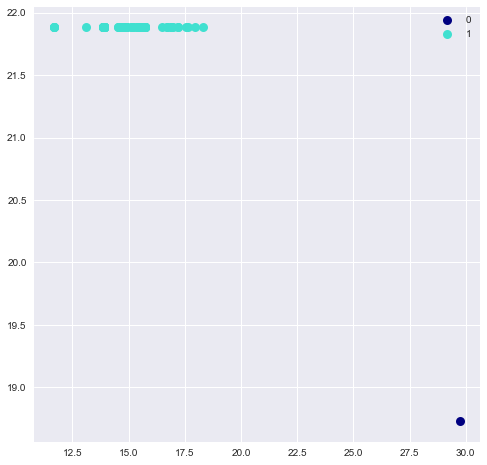

In [319]:
colors = ['navy', 'turquoise']

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], [0, 1]):
    plt.scatter(np.log(x_test_pca[y_pred == i, 0]), np.log(x_test_pca[y_pred == i, 1]),
                color=color, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

<ipython-input-318-3829e75a0c89>:5: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(x_test_pca[y_test == i, 0]), np.log(x_test_pca[y_test == i, 1]),


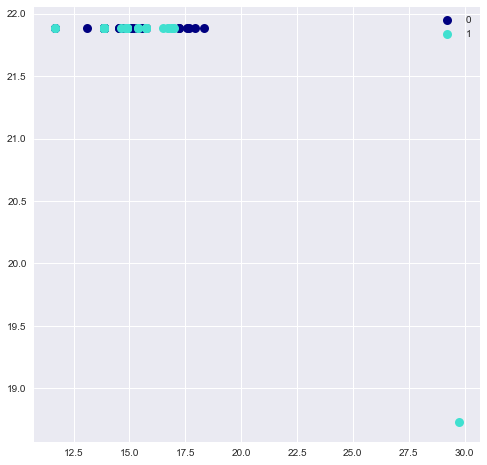

In [318]:
colors = ['navy', 'turquoise']

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], [0, 1]):
    plt.scatter(np.log(x_test_pca[y_test == i, 0]), np.log(x_test_pca[y_test == i, 1]),
                color=color, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

In [ ]:
colors = ['navy', 'turquoise']
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(X_test)
plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], [0, 1]):
    plt.scatter(np.log(x_test_pca[y_test == i, 0]), np.log(x_test_pca[y_test == i, 1]),
                color=color, lw=2, label=target_name, alpha=0.5)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

In [317]:
unique, counts = np.unique(y_test, return_counts=True)
print(unique)
print(counts)

[0 1]
[1116030 1114341]


In [279]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
roc_score_rf = roc_auc_score(y_test, y_pred_rf)
print('ROC-ACU score of Random Forest method is: ' + str(roc_score_rf))

ROC-ACU score of Random Forest method is: 0.6960644841790625


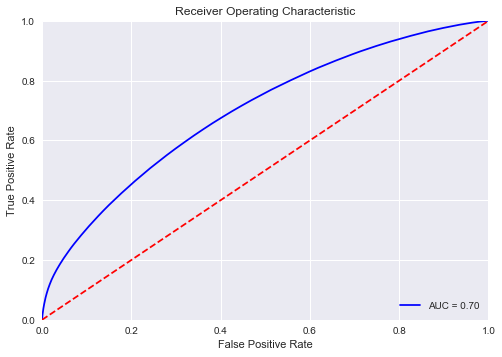

In [280]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_d = dt.predict(X_test)
a_score = accuracy_score(y_test, y_pred_d)
print('Accuracy score is: ' + str(a_score))
roc_score = roc_auc_score(y_test, y_pred_d)
print('ROC-AUC score of Decision Tree is: ' + str(roc_score))

Accuracy score is: 0.5720729869604653
ROC-AUC score of Decision Tree is: 0.5720729630879967


In [274]:
unique, counts = np.unique(y_pred, return_counts=True)

In [275]:
unique

array([0, 1], dtype=int8)

In [276]:
counts

array([   9478, 2220893])